In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
import sys
sys.path.append('/Fiuba-Big-Data-Analytics-TPs/Tp1/')
from BySanti import filter

In [76]:
train = pd.read_csv('/home/leandro/OrgaDeDatos/Fiuba-Big-Data-Analytics-TPs/Tp1/Datos/Entrenamieto_ECI_2020.csv')
filter.full_correction(train)

In [77]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,4,2015-06-16,...,"(5, 2016)",Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,4,2015-06-16,...,"(1, 2016)",Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2017)",Q1,2017,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,5,2015-04-20,...,"(2, 2016)",Q1,2016,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,5,2015-04-20,...,"(2, 2016)",Q1,2016,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Algunas de las Region Japan tienen Territory None, asi que reemplazo ese None por Japan

In [78]:
train.loc[(train.Territory =='None' )&(train.Region=='Japan'),'Territory'] = 'Japan'

In [79]:
train.head(20)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,4,2015-06-16,...,"(5, 2016)",Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,4,2015-06-16,...,"(1, 2016)",Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2017)",Q1,2017,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None
8,24353,Japan,Japan,1,0,0,0,0,5,2015-04-20,...,"(2, 2016)",Q1,2016,0,JPY,15600.0,JPY,470400.0,Closed Lost,Prod_Category_A_None
9,24355,Japan,Japan,1,0,0,0,0,5,2015-04-20,...,"(2, 2016)",Q1,2016,0,JPY,4400.0,JPY,470400.0,Closed Lost,Prod_Category_A_None


# Top Territorios con mas oportunidades

In [86]:
topPaises =  train[['Territory','ID']].groupby('Territory').count().rename(columns = {'ID' : 'Total_Oportudidades'})\
            .sort_values(by=['Total_Oportudidades'],ascending=False)
topPaises = topPaises.reset_index()
topPaises

,Territory,Total_Oportudidades
0,Japan,4892
1,Germany,1682
2,NW America,1568
3,Australia,1208
4,India,809
...,...,...
71,Burma,1
72,Solomon Islands,1
73,Slovenia,1
74,Monaco,1


Text(0.5, 1.0, 'Top 5 territorios con más opotunidades')

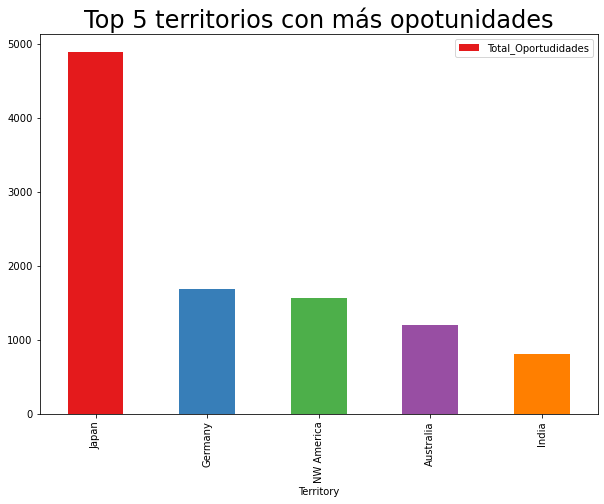

In [146]:
colores = plt.cm.Set1(range(5))
topPaises.head(5).plot(x= 'Territory', y='Total_Oportudidades' ,kind = 'bar',figsize= (10,7), color = colores)
plt.title('Top 5 territorios con más opotunidades',fontsize=24)


# Territorios con mas Opotunidades ganas y perdidas


In [147]:
train

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Month,Delivery_Quarter,Delivery_Year,Total_Power,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,4,2015-06-16,...,"(5, 2016)",Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,4,2015-06-16,...,"(1, 2016)",Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,4,2015-04-21,...,"(1, 2016)",Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,5,2013-07-27,...,"(2, 2018)",Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(4, 2016)",Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,4,2016-01-15,...,"(3, 2016)",Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,4,2015-10-20,...,"(4, 2016)",Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None
